In [1]:
%pip install tensorflow_datasets


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import io
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.empty_cache()
# import tensorflow_datasets as tfds
import torchvision.datasets as datasets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
from torchvision import utils as tvUtils
from torchvision import transforms as transforms
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# from tensorflow import keras
# from tensorflow.keras import layers

In [2]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'using device {device}')
print(torch.cuda.get_device_name(0))
batch_size=9

using device cuda:0
NVIDIA GeForce RTX 2060


In [3]:
transform = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize(mean=(0.137,), std=(0.3081,))])
train_data = datasets.FashionMNIST(root='data',train=True,transform=transform,download=True)
test_data = datasets.FashionMNIST(root='data', train=False, transform=transform)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

6667


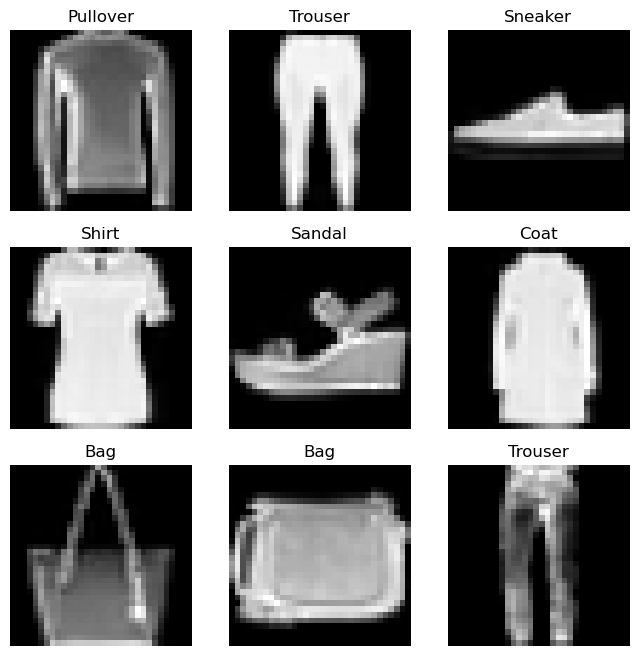

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


print(len(train_loader))
for j in range(1):
    for imgs, labels in train_loader:
        i = 1
        for label in range(len(labels)):
        # sample_idx = torch.randint(len(train_data), size=(1,)).item()
        # img, label = train_loader[sample_idx]
        # img = img/255
            #print(imgs[label])
            
            img = imgs[label]

            #print(val.shape)

            figure.add_subplot(rows, cols, i)
            
            plt.title(labels_map[labels[label].item()])
            i += 1
            plt.axis("off")
            #print(img)
            plt.imshow(img.squeeze(), cmap='gray')
        break
        
plt.show()


In [4]:
class CNN(nn.Module):
    def __init__(self, num_class):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        # self.batch_norm1 = nn.BatchNorm2d(6)
  
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.batch_norm2 = nn.BatchNorm2d(16)
       
        self.linear1 = nn.Linear(16*5*5, 120)
        self.linear2 = nn.Linear(120,84)
        self.linear3 = nn.Linear(84,num_class)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
learning_rates = [0.1,0.001,0.00001]
batch_sizes = [16,32,64]
num_classes=10
num_epoch = 5
# writer = SummaryWriter()
# train_writer = tf.summary.create_file_writer("logs/train")
# test_writer = tf.summary.create_file_writer("logs/test")


In [7]:

for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        writer = SummaryWriter(f'runs/FasionMNIST/batch_size_{batch_size}_lr_{learning_rate}')
        model = CNN(num_classes).to(device=device)
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        steps = len(train_data)
        transform = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize(mean=(0.137,), std=(0.3081,))])
        train_data = datasets.FashionMNIST(root='data',train=True,transform=transform,download=True)
        test_data = datasets.FashionMNIST(root='data', train=False, transform=transform)
        train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)
        for epoch in range(num_epoch):
            losses =[]
            for i, (imgs,labels) in enumerate(train_loader):
                imgs = imgs.to(device)
                labels = labels.to(device)
                outputs = model(imgs).to(device)
                loss = loss_fn(outputs, labels)
                writer.add_scalar(f'Loss/Training Loss', loss, epoch)
                losses.append(loss)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                if (i+1)%500 == 0:
                    print('Learning rate {}, batch size {}, Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                                .format(learning_rate,batch_size,epoch+1, num_epoch, i+1, steps, loss.item()))
            writer.add_hparams({'lr': learning_rate, 'batch_size': batch_size},{'loss':sum(losses)/len(losses)})
writer.close()

        

Learning rate 0.1, batch size 16, Epoch [1/5], Step [500/60000], Loss: 2.2844
Learning rate 0.1, batch size 16, Epoch [1/5], Step [1000/60000], Loss: 2.3750
Learning rate 0.1, batch size 16, Epoch [1/5], Step [1500/60000], Loss: 2.2506
Learning rate 0.1, batch size 16, Epoch [1/5], Step [2000/60000], Loss: 2.2909
Learning rate 0.1, batch size 16, Epoch [1/5], Step [2500/60000], Loss: 2.2399
Learning rate 0.1, batch size 16, Epoch [1/5], Step [3000/60000], Loss: 2.3296
Learning rate 0.1, batch size 16, Epoch [1/5], Step [3500/60000], Loss: 2.2786
Learning rate 0.1, batch size 16, Epoch [2/5], Step [500/60000], Loss: 2.2764
Learning rate 0.1, batch size 16, Epoch [2/5], Step [1000/60000], Loss: 2.2594
Learning rate 0.1, batch size 16, Epoch [2/5], Step [1500/60000], Loss: 2.3305
Learning rate 0.1, batch size 16, Epoch [2/5], Step [2000/60000], Loss: 2.3307
Learning rate 0.1, batch size 16, Epoch [2/5], Step [2500/60000], Loss: 2.3240
Learning rate 0.1, batch size 16, Epoch [2/5], Step [3

In [5]:
num_classes=10
learning_rate = 0.001
num_epoch = 10
#writer = SummaryWriter()
# train_writer = tf.summary.create_file_writer("logs/train")
# test_writer = tf.summary.create_file_writer("logs/test")
model = CNN(num_classes).to(device=device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
steps = len(train_data)
writer = SummaryWriter(f'runs/FasionMNISTTrain/batch_size_{batch_size}_lr_{learning_rate}')

In [9]:
for epoch in range(num_epoch):
    for i, (imgs,labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs).to(device)
        loss = loss_fn(outputs, labels)
        
        writer.add_scalar('Loss/Training Loss', loss, epoch)
        img_grid = tvUtils.make_grid(imgs)
        writer.add_image('mnist_image', img_grid)
        writer.add_histogram('fc1',model.linear3.weight)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1)%400 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epoch, i+1, steps, loss.item()))
writer.close()
torch.save(model.state_dict(),'./LeNet.pth')
        

Epoch [1/10], Step [400/60000], Loss: 0.4000
Epoch [1/10], Step [800/60000], Loss: 0.8143
Epoch [1/10], Step [1200/60000], Loss: 0.7404
Epoch [1/10], Step [1600/60000], Loss: 0.4938
Epoch [1/10], Step [2000/60000], Loss: 0.3369
Epoch [1/10], Step [2400/60000], Loss: 1.0027
Epoch [1/10], Step [2800/60000], Loss: 0.4706
Epoch [1/10], Step [3200/60000], Loss: 0.0960
Epoch [1/10], Step [3600/60000], Loss: 0.5472
Epoch [1/10], Step [4000/60000], Loss: 0.8032
Epoch [1/10], Step [4400/60000], Loss: 0.3772
Epoch [1/10], Step [4800/60000], Loss: 0.3518
Epoch [1/10], Step [5200/60000], Loss: 0.5045
Epoch [1/10], Step [5600/60000], Loss: 0.3745
Epoch [1/10], Step [6000/60000], Loss: 0.5873
Epoch [1/10], Step [6400/60000], Loss: 0.1114
Epoch [2/10], Step [400/60000], Loss: 0.1494
Epoch [2/10], Step [800/60000], Loss: 0.3455
Epoch [2/10], Step [1200/60000], Loss: 0.1859
Epoch [2/10], Step [1600/60000], Loss: 0.0872
Epoch [2/10], Step [2000/60000], Loss: 0.1938
Epoch [2/10], Step [2400/60000], Loss:

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        writer.add_scalar('Accuracy/Testing Accuracy', loss, epoch)
        print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))
        